# Spam message filter using Natural Language Processing

In [4]:
import nltk

In [2]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> Stopwords
    Error loading Stopwords: Package 'Stopwords' not found in index

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> stopwords
Command 'stopwords' unrecognized

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
      Unzipping corpora/st

In [5]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [4]:
print(len(messages))

5574


In [7]:
print(messages[0])

ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


In [6]:

#The enumerate() function adds a counter to an iterable. So for each element in cursor , a tuple is produced with (counter, element);
#the for loop binds that to row_number and row , respectively.
#It's a builtin generator function
for mess_no, message in enumerate(messages[:10]):
    print(mess_no,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [7]:
import pandas as pd

In [8]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t'
                      ,names=['label','message'])

In [9]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
# User groupby method on label and we can seperate the ham and spam
messages.groupby('label').describe()

message
label                                                          
ham   count                                                4825
      unique                                               4516
      top                                Sorry, I'll call later
      freq                                                   30
spam  count                                                 747
      unique                                                653
      top     Please call our customer service representativ...
      freq                                                    4

## Read about feature engineering 

In [12]:
messages['lenght'] = messages['message'].apply(len)

In [13]:
messages.head()

,label,message,lenght
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

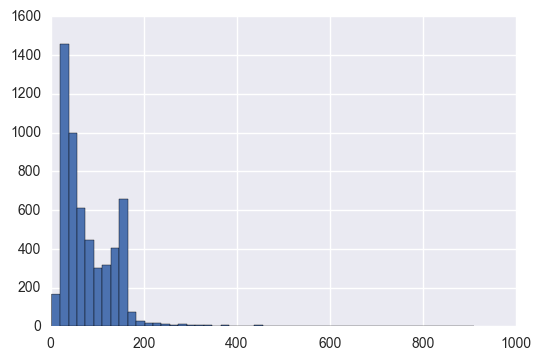

In [15]:
messages['lenght'].hist(bins=50)

In [16]:
#to view the entire message
messages[messages['lenght']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11bfbcbe0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11c732630>], dtype=object)

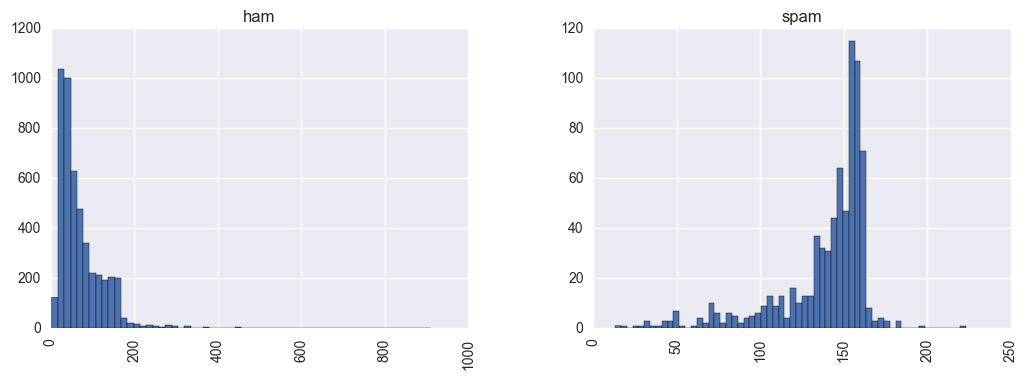

In [17]:
#Another method to facet grid
messages.hist(column='lenght' , by='label',bins=60,figsize=(12,4))

In [18]:
#From observation we come to know that spam messages have lenght.
#They have length of about 150.

# Lecture 2

In [19]:
# We are going to perform preprocessing as the algorithms we have learnt
#so far uses numerical features.
#Going to generate feature vector to perform classification tasks.

In [20]:
import string

In [21]:
from nltk.corpus import stopwords

In [22]:
def text_process(mess):
    """"
    1. Remove Punc
    2. Remove Stop Words
    3. Return a list of clean words
    """
    nopunc = [word for word in mess if word not in string.punctuation]
    join_nopunc = ''.join(nopunc)
    #split_nopunc = join_nopunc.split()
    #The above line can be included as part of the line below.
    return [word for word in join_nopunc.split() if word.lower() not in stopwords.words('english')]

In [23]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
bow_transformer = CountVectorizer(analyzer = text_process).fit(messages['message'])

In [31]:
print(len(bow_transformer.vocabulary_))

11425


In [32]:
mess4 = messages['message'][3]

In [33]:
print(mess4)

U dun say so early hor... U c already then say...


In [35]:
bow4 = bow_transformer.transform([mess4])

In [36]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [38]:
print(bow4.shape)

(1, 11425)


In [42]:
bow_transformer.get_feature_names()[9554]

'say'

In [44]:
messages_bow = bow_transformer.transform(messages['message'])

In [45]:
print('Shape of sparse Matrix:',messages_bow.shape)

Shape of sparse Matrix: (5572, 11425)


In [46]:
# amount of non zero occurances
messages_bow.nnz

50548

In [50]:
sparsity = (100.0 * messages_bow.nnz/(messages_bow.shape[0]*messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.07940295412668218


In [51]:
from sklearn.feature_extraction.text import TfidfTransformer

In [52]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [53]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [54]:
# Use Naive Base classifier algorithm

In [55]:
from sklearn.naive_bayes import MultinomialNB

In [56]:
spam_detect_model = MultinomialNB().fit(messages_tfidf,messages['label'])

In [57]:
from sklearn.cross_validation import train_test_split

In [66]:
msg_train,msg_test,label_train,label_test = train_test_split(messages['message'],messages['label'],test_size=0.3)

# Create a Data Pipeline

In [60]:
from sklearn.pipeline import Pipeline

In [61]:
pipeline = Pipeline([
        ('bow', CountVectorizer(analyzer=text_process)),
        ('tfidf', TfidfTransformer()),
        ('classifier', MultinomialNB())
    ])

In [67]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x11c786b70>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [68]:
predictions = pipeline.predict(msg_test)

In [71]:
from sklearn.metrics import confusion_matrix,classification_report

In [70]:
print(confusion_matrix(label_test,predictions))

[[1442    0]
 [  63  167]]


In [73]:
print(classification_report(label_test,predictions))

             precision    recall  f1-score   support

        ham       0.96      1.00      0.98      1442
       spam       1.00      0.73      0.84       230

avg / total       0.96      0.96      0.96      1672

